In [1]:
import os
import cv2
import numpy as np

def load_images_and_labels(base_dir):
    images = []
    labels = []

    # Loop through benign and malicious directories
    for label in ['benign', 'malicious']:
        dir_path = os.path.join(base_dir, label)
        if not os.path.exists(dir_path):
            print(f"Directory does not exist: {dir_path}")
            continue
        
        for subdir in os.listdir(dir_path):
            subdir_path = os.path.join(dir_path, subdir)
            if os.path.isdir(subdir_path):  # Check if it is a directory
                for filename in os.listdir(subdir_path):
                    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Ensure it’s the correct file type
                        img_path = os.path.join(subdir_path, filename)
                        img = cv2.imread(img_path)
                        if img is not None:  # Check if the image was loaded properly
                            img = cv2.resize(img, (224, 224))  # Resize to match model input
                            images.append(img)
                            labels.append(0 if label == 'benign' else 1)  # 0 for benign, 1 for malicious
                        else:
                            print(f"Warning: Could not load image {img_path}")
    
    print(f"Loaded {len(images)} images: {np.sum(np.array(labels) == 0)} benign and {np.sum(np.array(labels) == 1)} malicious.")
    return np.array(images), np.array(labels)

# Load images and labels
base_dir = '/kaggle/input/malware-as-images/data' 
print(1)
X, y = load_images_and_labels(base_dir)
print(3)

# Normalize pixel values
X = X.astype('float32') / 255.0


1
Loaded 1099 images: 488 benign and 611 malicious.
3


In [2]:
# Check the number of images loaded
num_images = len(X)
num_benign = np.sum(y == 0)  # Count benign images (label 0)
num_malicious = np.sum(y == 1)  # Count malicious images (label 1)

# Print the counts
print(f'Total number of images: {num_images}')
print(f'Number of benign images: {num_benign}')
print(f'Number of malicious images: {num_malicious}')


Total number of images: 1099
Number of benign images: 488
Number of malicious images: 611


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
import numpy as np

# Print class distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f'Class distribution: {class_distribution}')


Class distribution: {0: 488, 1: 611}


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5432 - loss: 0.6909 - val_accuracy: 0.5455 - val_loss: 0.6923 - learning_rate: 1.0000e-05
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5791 - loss: 0.6894 - val_accuracy: 0.5455 - val_loss: 0.6916 - learning_rate: 1.0000e-05
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5524 - loss: 0.6940 - val_accuracy: 0.5455 - val_loss: 0.6906 - learning_rate: 1.0000e-05
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5731 - loss: 0.6911 - val_accuracy: 0.5455 - val_loss: 0.6876 - learning_rate: 1.0000e-05
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5612 - loss: 0.6904 - val_accuracy: 0.5455 - val_loss: 0.6827 - learning_rate: 1.0000e-05
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5823 - loss: 0.6813 - val_accuracy: 0.6333 - val_loss: 0.6782 - learning_rate: 1.0000e-05
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7487 - loss: 0.6865 - v

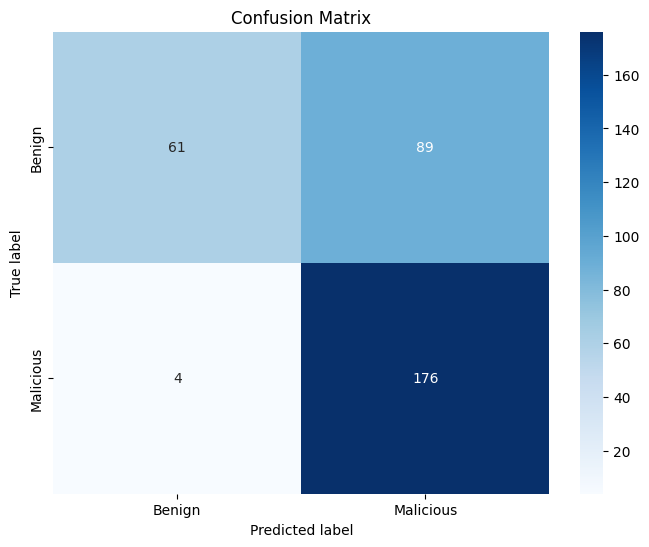


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.41      0.57       150
           1       0.66      0.98      0.79       180

    accuracy                           0.72       330
   macro avg       0.80      0.69      0.68       330
weighted avg       0.79      0.72      0.69       330



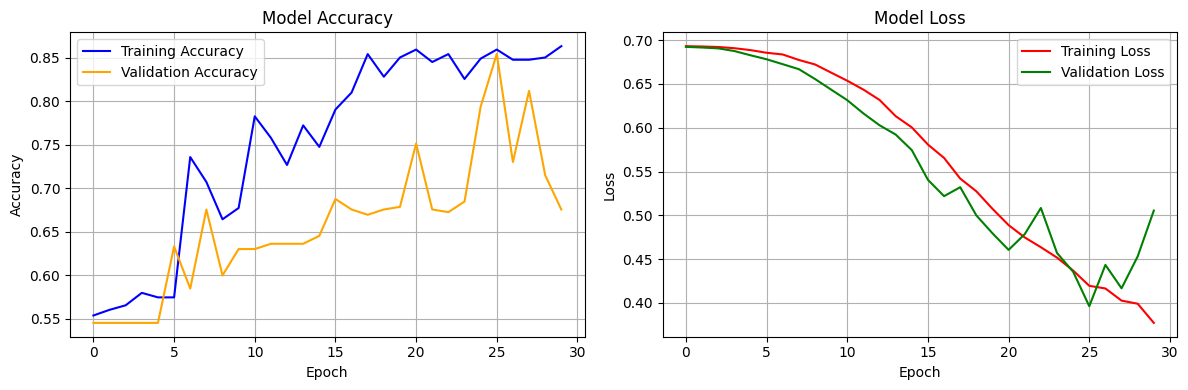

In [5]:
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define a more complex CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Class weights calculation
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_val.astype('float32') / 255.0, y_val),
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val.astype('float32') / 255.0, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predictions
y_pred = model.predict(X_val.astype('float32') / 255.0)

# Adjust threshold for predictions
threshold = 0.4  # Experiment with different thresholds
y_pred_classes = (y_pred > threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_classes))

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [6]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 538ms/step - accuracy: 0.6418 - loss: 16.5693
Validation Loss: 15.880122184753418
Validation Accuracy: 0.6454545259475708


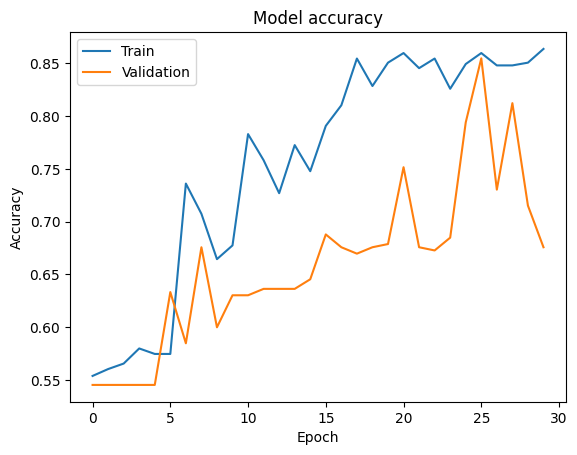

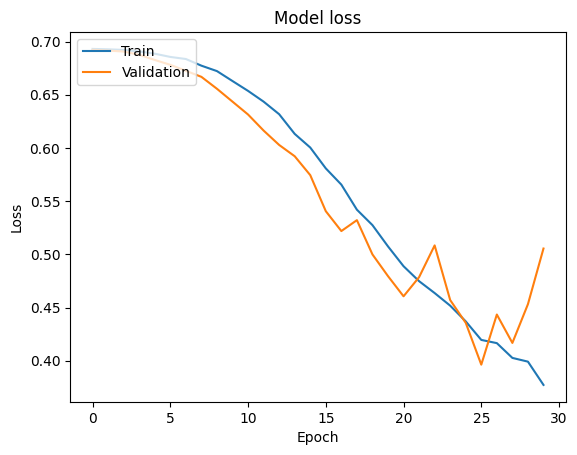

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
import cv2
import numpy as np
import os

# Path to the folder containing the images
image_folder_path = '/kaggle/input/lmlmkm'

# List to store the preprocessed images
preprocessed_images = []

# Load and preprocess each image
for image_name in os.listdir(image_folder_path):
    image_path = os.path.join(image_folder_path, image_name)
    image = cv2.imread(image_path)
    
    if image is not None:
        # Resize the image to the expected input size of the model
        image = cv2.resize(image, (224, 224))
        image = image.astype('float32') / 255.0  # Scale pixel values to [0, 1]
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    else:
        print(f"Could not load image: {image_name}")

# Convert the list of images to a numpy array
preprocessed_images = np.array(preprocessed_images)

# Predict for all images in the batch (preprocessed_images is already batched)
predictions = model.predict(preprocessed_images)

# Interpret and print the results for each image with filenames
for i, (image_name, prediction) in enumerate(zip(os.listdir(image_folder_path), predictions)):
    prob = prediction[0]  # Get the probability
    if prob > 0.5:
        print(f"{image_name}: Malicious (Probability: {prob:.2f})")
    else:
        print(f"{image_name}: Benign (Probability: {prob:.2f})")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Firefox Installer_lanczos_1200.png: Malicious (Probability: 1.00)
Firefox Installer_nearest_120.png: Malicious (Probability: 1.00)
Firefox Installer_nearest_300.png: Malicious (Probability: 1.00)
Firefox Installer_lanczos_120.png: Malicious (Probability: 1.00)
Firefox Installer_nearest_1200.png: Malicious (Probability: 1.00)
Firefox Installer_lanczos_600.png: Malicious (Probability: 1.00)
Firefox Installer_nearest_600.png: Malicious (Probability: 1.00)
Firefox Installer_lanczos_300.png: Malicious (Probability: 1.00)
